In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [88]:
train_all = pd.read_csv('Stock_Price_Train.csv')
train= train_all.loc[:, ['Open']].values

In [89]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)
train_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train = []
y_train = []
timesteps = 50
for i in range(timesteps, len(train)): #her 50 adımda bir 50 veri alıp 51. veriyi tahmin etmeye çalışacak
    x_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train,y_train 

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
         0.05065481],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
         0.05214302],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
         0.05612397],
        ...,
        [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.96569685, 0.97510976, 0.95966962, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [91]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [92]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_train

array([[0.05214302],
       [0.05612397],
       [0.05818885],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [93]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

rnn = Sequential()

rnn.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
rnn.add(Dropout(0.15))
rnn.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True))
rnn.add(Dropout(0.15))
rnn.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True))
rnn.add(Dropout(0.15))
rnn.add(SimpleRNN(units = 50, activation = 'tanh'))
rnn.add(Dropout(0.15))
rnn.add(Dense(units = 1))
rnn.add(Dropout(0.10))
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(x_train, y_train, epochs = 100, batch_size = 30)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.5515
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2612
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2311
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1731
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1424
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1257
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1200
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1128
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0912
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0732
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0687
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0641
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0702
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0578
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - l

In [97]:
dataset_test = pd.read_csv('Stock_Price_Test.csv')
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [98]:
dataset_total = pd.concat((train_all['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = sc.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


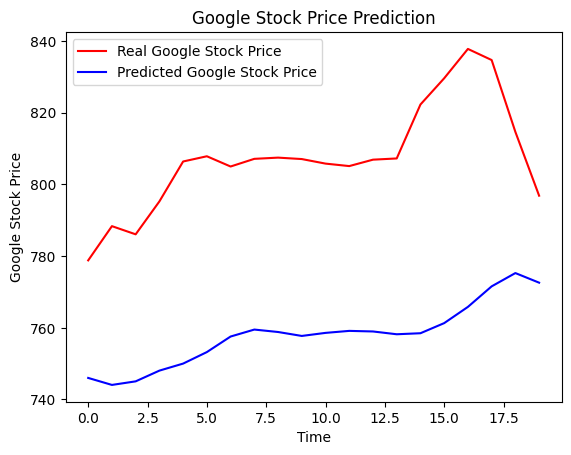

In [99]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()